<a href="https://colab.research.google.com/github/ClauderCarvalho/AnaliseFinanceira-Python/blob/master/Correla%C3%A7%C3%A3o_Entre_IBOV_%2B_DOLAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Autor = Clauder Noronha

Data = 24/05/2020

Analise financeira - relação entre o Ibov e o dolar. A relação e mensal e anual.

In [4]:
#Inatalar o pacote yFinance

!pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=d77e8b67a2b2a464bb9e1354caeb49743c5f9884c4ea0be09f83baad92aff63d
  Stored in directory: /tmp/pip-ephem-wheel-cache-0m49_qb3/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf

yf.pdr_override()

import seaborn as sns

##Obtendo e Tratando os Dados


In [11]:
tickers = ['^BVSP', 'USDBRL=X']

carteira = web.get_data_yahoo(tickers, start='2007-01-01')['Close']

[*********************100%***********************]  2 of 2 completed


In [12]:
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-01,2.1325,NaN
2007-01-02,2.1310,45383.0
2007-01-03,2.1345,44445.0
2007-01-04,2.1390,44020.0
2007-01-05,2.1470,42245.0
...,...,...
2020-05-18,5.8552,81194.0
2020-05-19,5.7190,80742.0
2020-05-20,5.7552,81319.0


Remover os dados faltantes

In [15]:
carteira = carteira.dropna()
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-02,2.1310,45383.0
2007-01-03,2.1345,44445.0
2007-01-04,2.1390,44020.0
2007-01-05,2.1470,42245.0
2007-01-08,2.1465,42830.0
...,...,...
2020-05-18,5.8552,81194.0
2020-05-19,5.7190,80742.0
2020-05-20,5.7552,81319.0


Renomear Colunas

In [17]:
carteira.columns =['Dolar','IBOV']
carteira

,Dolar,IBOV
Date,,
2007-01-02,2.1310,45383.0
2007-01-03,2.1345,44445.0
2007-01-04,2.1390,44020.0
2007-01-05,2.1470,42245.0
2007-01-08,2.1465,42830.0
...,...,...
2020-05-18,5.8552,81194.0
2020-05-19,5.7190,80742.0
2020-05-20,5.7552,81319.0


##Analise

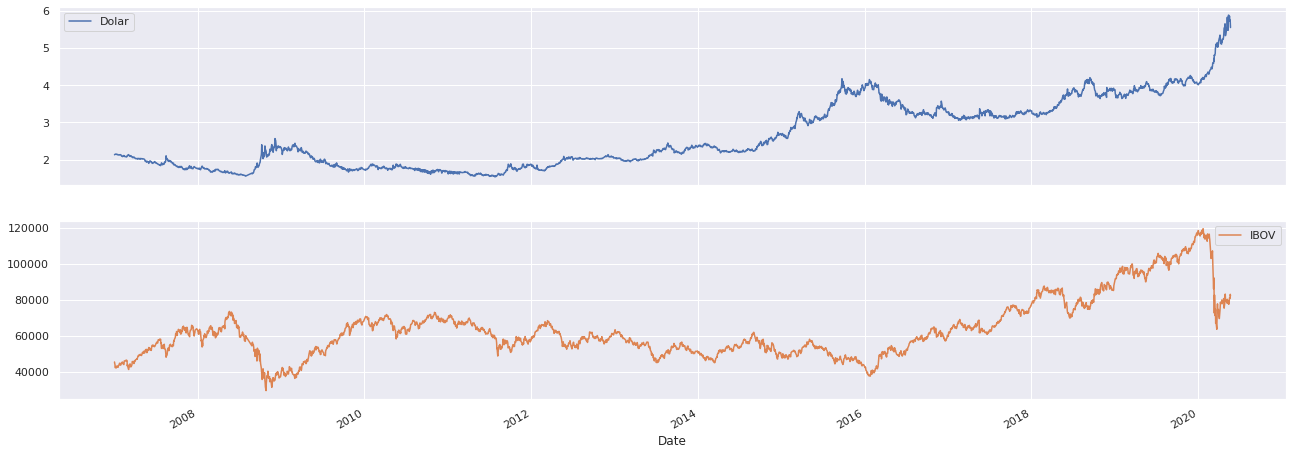

In [35]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8))

plt.show()

Correlação

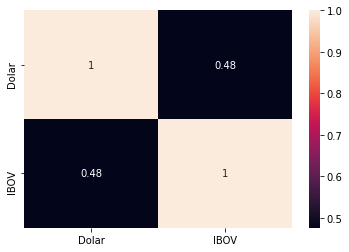

In [23]:
sns.heatmap(carteira.corr(), annot=True)
plt.show()

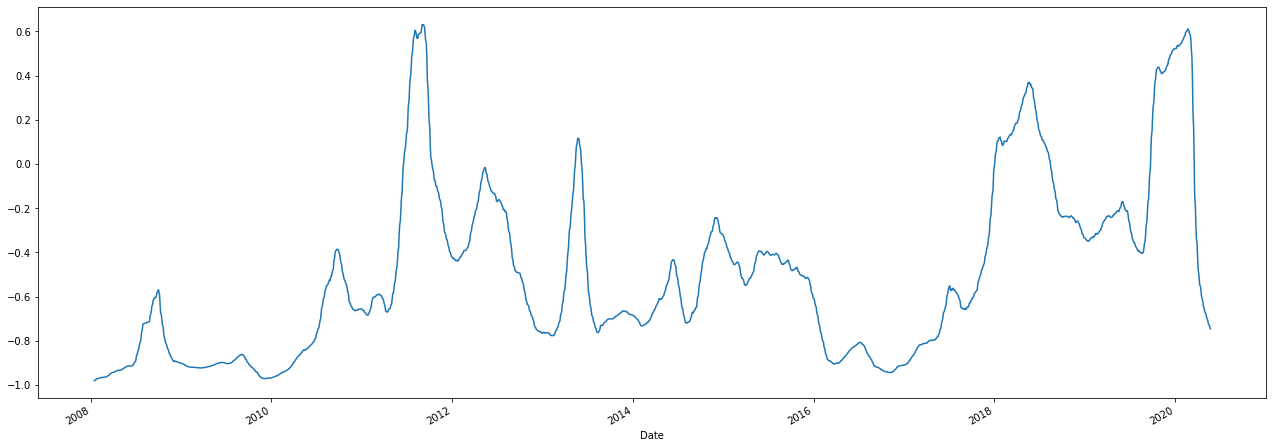

In [28]:
#Criar janelas de observação
#Janela Anual de 2006 a 2020
carteira['Dolar'].rolling(252).corr(carteira['IBOV']).plot(figsize=(22,8))

plt.show()


#Obseravamos a vriação durante o ano

In [0]:
#Criar uma nova coluna

carteira['IBOV_Dolarizado'] = (carteira['IBOV']/carteira['Dolar'])

In [31]:
carteira

#Temos a divisão da coluna dolar com a IBOV

,Dolar,IBOV,IBOV_Dolarizado
Date,,,
2007-01-02,2.1310,45383.0,21296.573959
2007-01-03,2.1345,44445.0,20822.206345
2007-01-04,2.1390,44020.0,20579.710732
2007-01-05,2.1470,42245.0,19676.291819
2007-01-08,2.1465,42830.0,19953.411504
...,...,...,...
2020-05-18,5.8552,81194.0,13866.990467
2020-05-19,5.7190,80742.0,14118.202822
2020-05-20,5.7552,81319.0,14129.656881


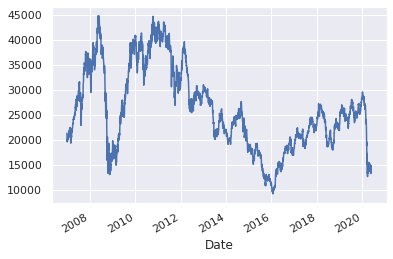

In [38]:
#Criar um grafico com a divisão da coluna IBOV/Dolar
carteira['IBOV_Dolarizado'] = (carteira['IBOV']/carteira['Dolar']).plot()